# Deskripsi Proyek

Proyek Anda ialah menyiapkan laporan untuk bank bagian kredit. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam melunasi pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.
Laporan Anda akan menjadi bahan pertimbangan pada saat membuat penilaian kredit untuk calon nasabah. Penilaian kredit digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

# Daftar Isi

* [Tujuan Proyek](#tujuan)
* [Import Dataset dan Library](#import)
    * [Eksplorasi Data](#explore)
    * [Distribusi Data yang Hilang](#null-distribution)
    * [Kesimpulan Dataset](#summary-data)
* [Pra-pemrosesan Data](#praprocessing)
    * [Menyetarakan Entri di Kolom `education`](#lower-education)
    * [Transformasi Data](#transformation)
        * [Kolom : `children`](#transformation-children)
        * [Kolom : `days_employed`](#transformation-daysemployed)
        * [Kolom : `gender`](#transformation-gender)
        * [Kolom : `total_income`](#transformation-income)
    * [Mengisi Nilai yang Hilang](#fill-null)
        * [Kolom : `total_income`](#fill-income)
        * [Kolom : `days_employed`](#fill-days)
    * [Menambah Kolom yang Dibutuhkan](#add-column)
* [Pengkategorian Data](#data-cat)
    * [Kolom : `years_employed`](#data-cat-years)
    * [Kolom : `total_income`](#data-cat-income)
* [Memeriksa Hipotesis](#check-hypothesis)
    * [Jumlah Anak](#children)
    * [Status Keluarga](#family-status)
    * [Tingkat Pendapatan](#total-income)
    * [Tujuan](#purpose)


# Tujuan Proyek <a id='tujuan'></a>

Tujuan dari proyek ini adalah **untuk melakukan pra-pemrosesan data** dimana hal-hal yang dilakukan adalah:
1. Mengidentifikasi nilai-nilai yang hilang
2. Mengganti tipe data menjadi tipe data yang dibutuhkan
3. Menghapus data duplikat
4. Mengkategorikan data

Setelah melakukan pra-pemrosesan data, dapat dilakukan analisis data untuk menjawab apakah ada hubungan antara gagal bayar dengan:
1. Jumlah anak
2. Status perkawinan
3. Tingkat pendapatan
4. Tujuan peminjaman

# Import Dataset dan Library <a id='import'></a>

In [2]:
#import the library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import the dataset
credit_scoring = pd.read_csv('credit_scoring_eng.csv')

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Eksplorasi Data <a id='explore'></a>

Data yang disediakan pihak bank memiliki beberapa kolom, diantaranya :
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

In [3]:
#check the dataset shape
credit_scoring.shape

(21525, 12)

In [4]:
#check the dataset information
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
#check the description of the dataset
round(credit_scoring.describe(), 2)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.00,19351.00,21525.00,21525.00,21525.00,21525.00,19351.00
mean,0.54,63046.50,43.29,0.82,0.97,0.08,26787.57
std,1.38,140827.31,12.57,0.55,1.42,0.27,16475.45
min,-1.00,-18388.95,0.00,0.00,0.00,0.00,3306.76
25%,0.00,-2747.42,33.00,1.00,0.00,0.00,16488.50
50%,0.00,-1203.37,42.00,1.00,0.00,0.00,23202.87
75%,1.00,-291.10,53.00,1.00,1.00,0.00,32549.61
max,20.00,401755.40,75.00,4.00,4.00,1.00,362496.64


In [6]:
#check the null value
credit_scoring.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

## Distribusi Data yang Hilang <a id='null-distribution'></a>

In [7]:
#create a new dataset that contains null value
credit_scoring_null = credit_scoring[(credit_scoring['days_employed'].isna()) & credit_scoring['total_income'].isna()].reset_index(drop=True)

#check the dataset
credit_scoring_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [8]:
#column 'dob_years'
round((credit_scoring_null['dob_years'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

34    3.17
40    3.04
42    2.99
31    2.99
35    2.94
Name: dob_years, dtype: float64

In [9]:
#column 'education'
round((credit_scoring_null['education'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

secondary education    64.77
bachelor's degree      22.82
SECONDARY EDUCATION     3.08
Secondary Education     2.99
some college            2.53
Name: education, dtype: float64

In [10]:
#column 'family_status'
round((credit_scoring_null['family_status'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

married              56.90
civil partnership    20.33
unmarried            13.25
divorced              5.15
widow / widower       4.37
Name: family_status, dtype: float64

In [11]:
#column'gender'
round((credit_scoring_null['gender'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

F    68.26
M    31.74
Name: gender, dtype: float64

In [12]:
#column 'income_type'
round((credit_scoring_null['income_type'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

employee         50.83
business         23.37
retiree          19.00
civil servant     6.76
entrepreneur      0.05
Name: income_type, dtype: float64

In [13]:
#column 'purpose'
round((credit_scoring_null['purpose'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

having a wedding                4.23
to have a wedding               3.73
wedding ceremony                3.50
construction of own property    3.45
housing transactions            3.40
Name: purpose, dtype: float64

Dari data diatas, pada kolom `purpose` dapat dilihat bahwa ada beberapa tujuan kredit yang memiliki entri berbeda namun sebenarnya memiliki tujuan yang sama. Sehingga lebih baik disatukan saja.

In [14]:
#categorize the purpose under house
credit_scoring.loc[credit_scoring['purpose'].isin(['building a property','building a real estate',
                                                   'buy commercial real estate','buy real estate', 'buy residential real estate','buying property for renting out','construction of own property','housing','housing renovation',
                                                   'housing transactions','purchase of my own house','purchase of the house',
                                                   'purchase of the house for my family','real estate transactions','transactions with commercial real estate',
                                                   'transactions with my real estate','property']), 'purpose'] = 'house'
#check the dataset
credit_scoring['purpose'].unique()

array(['house', 'car purchase', 'supplementary education',
       'to have a wedding', 'education', 'having a wedding',
       'buying a second-hand car', 'buying my own car', 'cars',
       'to become educated', 'second-hand car purchase',
       'getting an education', 'car', 'wedding ceremony',
       'to get a supplementary education', 'getting higher education',
       'to own a car', 'purchase of a car', 'profile education',
       'university education', 'to buy a car', 'going to university'],
      dtype=object)

In [15]:
#categorize the purpose under cars
credit_scoring.loc[credit_scoring['purpose'].isin(['buying a second-hand car','buying my own car','car','car purchase','purchase of a car','second-hand car purchase','to buy a car','to own a car']), 'purpose'] = 'cars'

#check the dataset
credit_scoring['purpose'].unique()

array(['house', 'cars', 'supplementary education', 'to have a wedding',
       'education', 'having a wedding', 'to become educated',
       'getting an education', 'wedding ceremony',
       'to get a supplementary education', 'getting higher education',
       'profile education', 'university education', 'going to university'],
      dtype=object)

In [16]:
#categorize the purpose under education
credit_scoring.loc[credit_scoring['purpose'].isin(['getting an education','getting higher education','going to university','profile education','supplementary education','to become educated','to get a supplementary education','university education']), 'purpose'] = 'education'

#check the dataset
credit_scoring['purpose'].unique()

array(['house', 'cars', 'education', 'to have a wedding',
       'having a wedding', 'wedding ceremony'], dtype=object)

In [17]:
#categorize the purpose under wedding
credit_scoring.loc[credit_scoring['purpose'].isin(['having a wedding','to have a wedding','wedding ceremony']), 'purpose'] = 'wedding'

#check the dataset
credit_scoring['purpose'].unique()

array(['house', 'cars', 'education', 'wedding'], dtype=object)

Sehingga bisa dilihat kembali distribusi data yang hilang untuk kolom `purpose`

In [18]:
#renew the dataset
credit_scoring_null = credit_scoring[(credit_scoring['days_employed'].isna()) & credit_scoring['total_income'].isna()].reset_index(drop=True)

#check the dataset
credit_scoring_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,house
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,cars
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,wedding


In [19]:
#column 'purpose'
round((credit_scoring_null['purpose'].value_counts(normalize=True) * 100).sort_values(ascending=False), 2).head()

house        49.77
education    19.55
cars         19.23
wedding      11.45
Name: purpose, dtype: float64

## Kesimpulan Dataset Sementara <a id='summary-data'></a>

Dari hasil eksplorasi data, dapat disimpulkan bahwa:
1. Dari data.head, dapat dilihat bahwa kolom `education` memiliki beberapa entri yang menggunakan huruf kapital
2. Dataset mempunyai 12 kolom dan 21.525 entri
3. Terdapat nilai minus pada kolom `days_employed` dan `children` dimana tidak mungkin bahwa jumlah waktu bekerja dan jumlah anak adalah minus
4. Terdapat nilai yang tidak masuk akal pada kolom `dob_years` dimana ada nasabah dengan usia 0
5. Terdapat nilai yang hilang di kolom `days_employed` dan `total_income`
6. Tipe dataset ada yang tidak sesuai:
    - Pada kolom `days_employed` seharusnya tipe data int karena tidak masuk akal jika waktu bekerja dihitung dalam desimal (float)
7. Data yang hilang paling banyak berdasarkan kolom adalah:
    - dob_years = 34 tahun (3,17%)
    - education = secondary education (70,84%)
    - family_status = married (56,9%)
    - gender = female (68,26%)
    - income_type = employee (50,83%)
    - purpose = house (49,77%)


Kesimpulan ini bersifat sementara dan masih bisa menemukan beberapa masalah yang dapat terjadi pada saat analisis. 

# Pra-Pemrosesan Data <a id='praprocessing'></a>

## Menyetarakan Entri di Kolom `education` <a id='lower-education'></a>

In [20]:
#lowercase entries in column education
credit_scoring['education'] = credit_scoring['education'].str.lower()

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,cars
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding


## Transformasi Data <a id='transformation'></a>

Pada kesimpulan sebelumnya, terdapat beberapa masalah terutama adanya nilai yang tidak masuk akal sehingga masalah tersebut perlu ditangani terlebih dahulu

### Kolom : `children` <a id='transformation-children'></a>

Dari kesimpulan sebelumnya, kolom `children` memiliki nilai yang tidak masuk akal yaitu nilai minus dan pada satu keluarga ada 20 anak. Secara logika, tidak mungkin sebuah keluarga memiliki anak dengan nilai minus dan pada zaman sekarang sangat jarang keluarga dengan anak sebanyak 20 orang. Salah satu kemungkinan dari nilai yang aneh ini adalah kesalahan dalam input data atau penulisan (typo).

In [21]:
#check the dataset
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [22]:
#replace the data
credit_scoring['children'] = credit_scoring['children'].abs()
credit_scoring['children'] = credit_scoring['children'].replace([20], 2)

#check the dataset
credit_scoring['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Kolom : `days_employed` <a id='transformation-daysemployed'></a>

Dari kesimpulan sebelumnya, ada beberapa data pada kolom `days_employed` yang memiliki nilai negatif. Secara logika, tidak mungkin seseorang bekerja selama minus x hari. Selain itu, tipe data pada kolom `days_employed` adalah float dimana tidak masuk akal apabila seseorang telah bekerja selama 0,x hari.

In [23]:
#check the presentage of odd value
days_null = len(credit_scoring.loc[credit_scoring['days_employed'] < 0])
percentage_days_null = days_null / len(credit_scoring) * 100
print (round(percentage_days_null, 2))

73.9


In [24]:
#replace the odd data
credit_scoring['days_employed'] = credit_scoring['days_employed'].abs()

#check the dataset
credit_scoring.loc[credit_scoring['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [25]:
#rounding up the days_employed
credit_scoring['days_employed'] = np.ceil(credit_scoring['days_employed'])

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding


### Kolom : `dob_years` <a id='transformation-years'></a>

Pada kesimpulan sebelumnya, kolom `dob_years` memiliki nilai aneh dimana seorang nasabah mempunyai usia 0. Secara logika, apabila seseorang baru berusia 0 tahun tidak dapat mengajukan pinjaman ke bank. 

In [26]:
#check persentage of odd value
years_odd = len(credit_scoring.loc[credit_scoring['dob_years'] == 0])
percentage_years_null = years_odd / len(credit_scoring) * 100

round(percentage_years_null, 2)

0.47

Data yang bermasalah pada kolom `dob_years` sebanyak 0,47% dari keseluruhan data. Untuk menentukan pengisian data pada kolom `dob_years`, maka bisa dilihat distribusi datanya menggunakan boxplot untuk melihat adanya outlier atau tidak.

In [27]:
#create a new dataset
dob_years_clean = credit_scoring.loc[credit_scoring['dob_years'] != 0]

#check the dataset
dob_years_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding


D:\003 LES\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


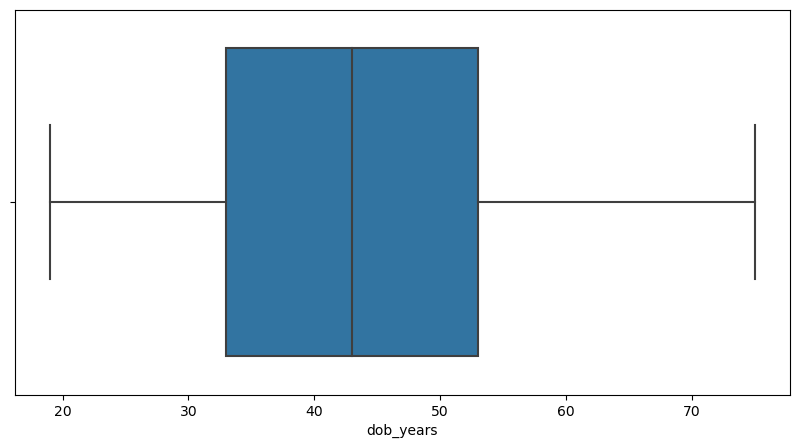

In [28]:
#create a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(dob_years_clean['dob_years'])
plt.show()

Dari data diatas, dapat dilihat bahwa untuk kolom `dob_years` tidak ada outlier, yaitu data yang terletak diluar garis. Sehingga nilai 0 pada kolom tersebut bisa diisi dengan rata-rata usia seluruh nasabah.

In [29]:
#check the average of years
ave_age_years = round(credit_scoring['dob_years'].mean(), 0)
ave_age_years

43.0

In [30]:
#change the value
credit_scoring['dob_years'] = credit_scoring['dob_years'].replace([0], ave_age_years)

#check the dataset
credit_scoring.loc[credit_scoring ['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


### Kolom : `gender` <a id='transformation-gender'></a>

Dari hasil eksplorasi data, belum terlihat apakah ada masalah pada kolom gender sehingga perlu dicek kembali.

In [31]:
#check the odd value
credit_scoring['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Dari data diatas, terlihat bahwa ada 1 data yang tidak tepat untuk mendeskripsikan jenis kelamin nasabah. Hal ini dapat terjadi karena kesalahan dalam penginputan data. Sehingga data yang dihasilkan harus di*cleaning.* 

Proses trasformasi data bisa dimulai dengan melihat baris yang memiliki nilai `gender` XNA.

In [32]:
#check the odd value XNA
credit_scoring.loc[credit_scoring['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2359.0,24,some college,2,civil partnership,1,XNA,business,0,32624.825,house


Nilai 'XNA' bisa diganti dengan nilai yang paling sering muncul dan dapat diketahui dengan metode `mode()`. Hal ini disebabkan oleh tidak ada parameter apapun untuk menentukan bahwa nasabah pada entri tersebut laki-laki dan perempuan.

In [33]:
#check the gender that has the most value
credit_scoring['gender'].mode()

0    F
Name: gender, dtype: object

In [34]:
#replace the XNA
credit_scoring['gender'] = credit_scoring['gender'].replace(['XNA'], 'F')

#check the dataset
credit_scoring['gender'].value_counts()

F    14237
M     7288
Name: gender, dtype: int64

### Kolom : `total_income` <a id='transformation-income'></a>

Dari hasil eksplorasi data, belum terlihat apakah ada masalah pada kolom `total_income` sehingga perlu dicek kembali.

In [35]:
#check the odd value
credit_scoring['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Kolom `income_type` berhubungan dengan `total_income` dan `days_employed`. Sehingga lebih baik untuk melihat data dari keseluruhan kolom tersebut untuk mengetahui adanya nilai yang aneh atau tidak.

Value yang kecil kemungkinannya untuk mempunyai `total_income` dan `days_employed` adalah value unemployed dan student. Sehingga dari dua value tersebut dapat dilihat apakah ada nilai yang aneh.

In [36]:
#check the odd value
credit_scoring.loc[credit_scoring['income_type'] == 'unemployed']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337525.0,31,secondary education,1,married,0,M,unemployed,1,9593.119,house
14798,0,395303.0,45,bachelor's degree,0,civil partnership,1,F,unemployed,0,32435.602,house


Nasabah dengan `income_type` unemployed atau tidak bekerja keduanya memiliki nilai lama waktu bekerja dan total pendapatan. Hal ini kecil kemungkinan terjadi karena secara logika apabila tidak bekerja maka tidak mempunyai lama waktu bekerja dan pendapatan. Sehingga data yang didapatkan tidak akurat.

Hal tersebut bisa terjadi salah satunya mungkin nasabah memiliki kebingunan apakah waktu lama bekerja dan total pendapatan yang diisi adalah waktu bekerja terakhir dan total pendapatan terakhir yang dimilikinya. Atau adanya kemungkinan bahwa nasabah mengisi data tersebut agar di*ACC* creditnya (melakukan kebohongan). Sehingga, untuk data tersebut lebih baik dihilangkan.

In [37]:
#drop the odd value
credit_scoring.drop(credit_scoring[credit_scoring['income_type'] == 'unemployed'].index, inplace=True)

#check the dataset
credit_scoring.loc[credit_scoring['income_type'] == 'unemployed']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Selain value unemployed, untuk value student pada kolom `income_type` juga kecil kemungkinannya untuk memiliki pemasukan dan lama waktu bekerja. 

In [38]:
#check the dataset
credit_scoring.loc[credit_scoring['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9410,0,579.0,22,bachelor's degree,0,unmarried,4,M,student,0,15712.26,house


In [39]:
#drop the odd value
credit_scoring.drop(credit_scoring[credit_scoring['income_type'] == 'student'].index, inplace=True)

#check the dataset
credit_scoring.loc[credit_scoring['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


## Mengisi Nilai yang Hilang <a id='fill-null'></a>

Jumlah nilai yang hilang pada kolom `days_employed` dan `total_income` adalah sama, sehingga perlu dicek apakah nilai yang hilang simetris atau tidak.

In [40]:
#check the dataset that has null value
missing_total = credit_scoring.loc[credit_scoring['total_income'].isna()]

#check the missing value
missing_total.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [41]:
#check the dataset that has null value on days_employed
credit_scoring.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Dari data diatas, dapat disimpulkan bahwa nilai NaN yang berada di kolom `days_employed` dengan `total_income` tampak simetris. Hal ini dibuktikan bahwa jumlah nilai data yang hilang sama baik setelah difilter maupun sebelum difilter. Sehingga data yang hilang berada di baris yang sama.

### Kolom : `total_income` <a id='fill-income'></a>

Entri dari kolom `total_income` bisa dipengaruhi oleh 2 hal, yaitu usia dan jenis pemasukan (`income_type`).

In [42]:
#categorize the years
## create a function
def age_group(age):
  if age <= 18:
    a = 'underage'
  elif 18 < age <= 64:
    a = 'adult'
  elif age >= 65:
    a = 'elderly'
  return a

In [43]:
#check the function
age_group(89)

'elderly'

In [44]:
#apply the function
credit_scoring['age_group'] = credit_scoring['dob_years'].apply(age_group)

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,adult


Beberapa faktor yang mempengaruhi pendapatan adalah lamanya waktu bekerja dan usia.  Pengisian nilai NaN pada kolom `total_income` harus menggunakan dataset yang bersih.

In [45]:
#create a clean dataset
total_income_clean = credit_scoring.loc[~credit_scoring['total_income'].isna()]
total_income_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,adult


D:\003 LES\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


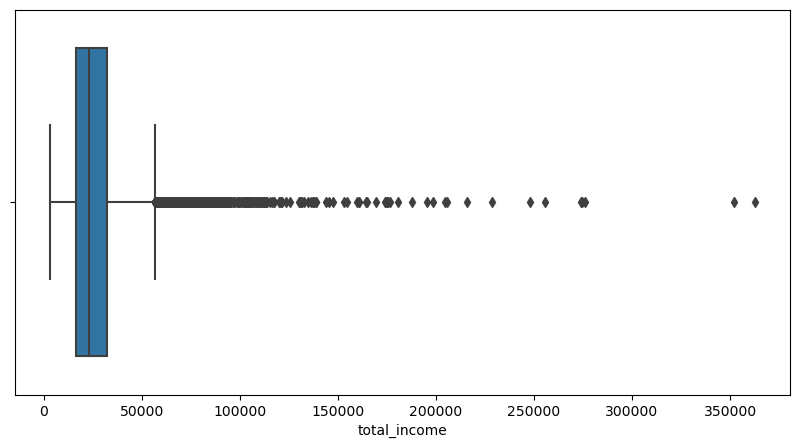

In [46]:
#check the outlier
plt.figure(figsize=(10,5))
sns.boxplot(total_income_clean['total_income'])
plt.show();

Dari visualisasi data diatas, dapat dilihat bahwa terdapat banyak outlier dari data `total_income`. Sehingga pengisian data bisa menggunakan nilai median. Nilai outlier bisa dilihat dari titik-titik yang berada diluar garis box.

In [47]:
#create a pivot table
income_type_pivot = pd.pivot_table(total_income_clean,
                       index=['income_type'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
round(income_type_pivot, 2)

,median,mean
,total_income,total_income
income_type,,
business,27577.27,32386.79
civil servant,24071.67,27343.73
employee,22815.10,25820.84
entrepreneur,79866.10,79866.10
paternity / maternity leave,8612.66,8612.66
retiree,18962.32,21940.39


In [48]:
#create a function
def fill_missing_value (credit_scoring, income_type, total_income):
    grouped_values = credit_scoring.groupby('income_type')['total_income'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['income_type'][i]
        value = grouped_values['total_income'][i]
        credit_scoring.loc[(credit_scoring['income_type']==group) & (credit_scoring['total_income'].isna()), 'total_income'] = value
    return credit_scoring

#apply the function
credit_scoring = fill_missing_value(credit_scoring, 'income_type', 'total_income')

#check the dataset
credit_scoring['total_income'].isna().sum()

0

### Kolom : `days_employed` <a id='fill-days'></a>

Memperbaiki nilai nilai yang hilang pada kolom `days_employed` bisa dimulai dari melihat distribusi data dan outliers yang ada. 

In [49]:
#create a clean dataset
days_employed_clean = credit_scoring.loc[~credit_scoring['days_employed'].isna()]

#check the dataset
days_employed_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,adult


D:\003 LES\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


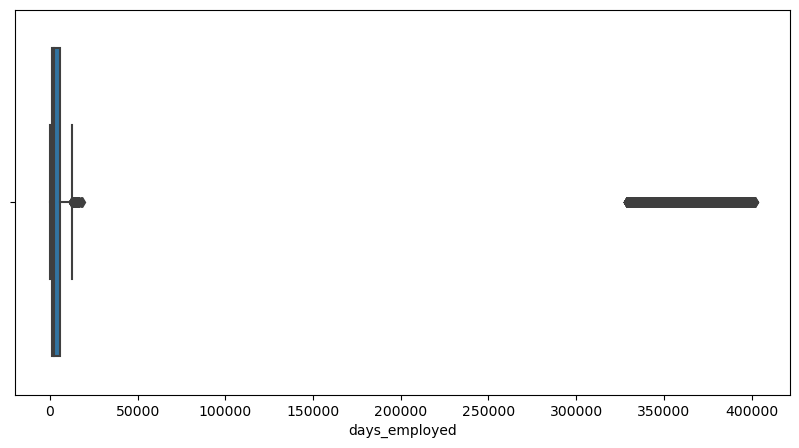

In [50]:
#create a box plot
plt.figure(figsize=(10,5))
sns.boxplot(days_employed_clean['days_employed']);

Dari data diatas, dapat dilihat bahwa terdapat banyak outliers yang ada di data `days_employed`. Sehingga keputusan yang diambil adalah dengan mengisi data null dengan median. 

In [51]:
#create a pivot table
days_age_group_pivot = pd.pivot_table(days_employed_clean,
                       index=['age_group'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
round(days_age_group_pivot, 2)

,median,mean
,total_income,total_income
age_group,,
adult,23383.13,27020.32
elderly,18471.39,21542.65


In [52]:
#create a function
def fill_missing_value (credit_scoring, age_group, days_employed):
    grouped_values = credit_scoring.groupby('age_group')['days_employed'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['age_group'][i]
        value = grouped_values['days_employed'][i]
        credit_scoring.loc[(credit_scoring['age_group']==group) & (credit_scoring['days_employed'].isna()), 'days_employed'] = value
    return credit_scoring

#apply the function
credit_scoring = fill_missing_value(credit_scoring, 'age_group', 'days_employed')

#check the dataset
credit_scoring['days_employed'].isna().sum()

0

In [53]:
#check the null value
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21522 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21522 non-null  int64  
 1   days_employed     21522 non-null  float64
 2   dob_years         21522 non-null  int64  
 3   education         21522 non-null  object 
 4   education_id      21522 non-null  int64  
 5   family_status     21522 non-null  object 
 6   family_status_id  21522 non-null  int64  
 7   gender            21522 non-null  object 
 8   income_type       21522 non-null  object 
 9   debt              21522 non-null  int64  
 10  total_income      21522 non-null  float64
 11  purpose           21522 non-null  object 
 12  age_group         21522 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


Dari data diatas dapat disimpulkan bahwa semua nilai null sudah terisi karena setiap kolom memiliki jumlah entri yang sama.

## Menambah Kolom yang Dibutuhkan <a id='add-column'></a>

Pada kolom `days_employed` memiliki satuan hari, dimana telalu rumit untuk melakukan analisis. Sehingga jumlah hari dapat diubah menjadi tahun.

In [54]:
#convert days to years
credit_scoring['years_employed'] = round(credit_scoring['days_employed'] / 365, 0)

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,years_employed
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult,23.0
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult,11.0
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult,15.0
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult,11.0
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,adult,932.0


Dari data diatas, dapat dilihat bahwa ada beberapa data yang menunjukkan lama waktu bekerja dalam tahun lebih dari usia nasabah. Sehingga, secara logika hal ini tidak masuk akal. Kejadian ini bisa terjadi apabila adanya salah input data atau typo dalam memasukkan tanggal bekerja.

Hal yang dapat dilakukan adalah menghilangkan data tersebut.

Penggolongan di Indonesia untuk usia produktif adalah 15 - 64 tahun. Sehingga, usia termuda seseorang dapat bekerja adalah 15 tahun.

In [55]:
#calculate the maximum working year
credit_scoring['max_working_years'] = credit_scoring['dob_years'] - 15

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,years_employed,max_working_years
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult,23.0,27
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult,11.0,21
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult,15.0,18
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult,11.0,17
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,adult,932.0,38


In [56]:
#drop the odd values
credit_scoring.drop(credit_scoring.loc[credit_scoring['years_employed'] > credit_scoring['max_working_years']].index, inplace=True)

#check the dataset
credit_scoring.loc[credit_scoring['years_employed'] > credit_scoring['max_working_years']]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,years_employed,max_working_years


In [57]:
#check the dataset info
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17958 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           17958 non-null  int64  
 1   days_employed      17958 non-null  float64
 2   dob_years          17958 non-null  int64  
 3   education          17958 non-null  object 
 4   education_id       17958 non-null  int64  
 5   family_status      17958 non-null  object 
 6   family_status_id   17958 non-null  int64  
 7   gender             17958 non-null  object 
 8   income_type        17958 non-null  object 
 9   debt               17958 non-null  int64  
 10  total_income       17958 non-null  float64
 11  purpose            17958 non-null  object 
 12  age_group          17958 non-null  object 
 13  years_employed     17958 non-null  float64
 14  max_working_years  17958 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 2.2+ MB


# Pengkategorian Data <a id='data-cat'></a>

Proses pengkategorian data berguna untuk memudahkan user membaca data yang akan diserahkan. Dalam dataframe `credit_scoring` beberapa kolom bisa dikategorikan. Kolom yang akan dikategorikan adalah kolom `dob_years` (sudah), `days_employed`, dan `total_income`.

### Kolom : `years_employed` <a id='data-cat-years'></a>

Kolom pertama yang akan dikategorikan adalah kolom `years_employed`. Kolom `years_employed` dapat dikategorikan sebagai berikut:
1. Apabila jumlah pengalaman bekerja <= 3 tahun, maka termasuk kategori `new employee`
2. Apabila jumlah pengalaman bekerja > 3 tahun, maka termasuk kategori `old employee` 

Rentang ini didapatkan berdasarkan teori yang berasal dari buku Manajemen Personalia dan Sumber Daya Manusia. Buku ini ditulis oleh Handoko, H pada tahun 2010 dan diterbitkan oleh BPFE UGM, Jogjakarta. 

In [59]:
#create a function
def days_employed_cat(days):
  try:
    if days <= 1095:
      a = 'new employee'
    elif days > 1095:
      a = 'old employee'
    return a
  except:
    return 'unidentified'

#apply the function
credit_scoring['days_employed_cat'] = credit_scoring['days_employed'].apply(days_employed_cat)

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,years_employed,max_working_years,years_employed_cat,days_employed_cat
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult,23.0,27,unidentified,old employee
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult,11.0,21,unidentified,old employee
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult,15.0,18,unidentified,old employee
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult,11.0,17,unidentified,old employee
5,0,927.0,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,house,adult,3.0,12,unidentified,new employee


In [60]:
#check the new category
credit_scoring['days_employed_cat'].value_counts()

old employee    12231
new employee     5727
Name: days_employed_cat, dtype: int64

### Kolom : `total_income` <a id='data-cat-income'></a>

Kolom ini diatur berdasarkan analisa yang dilakukan di Amerika. Hal ini disebabkan oleh data dari kolom `total_income` memiliki nilai dalam mata uang dollar sehingga akan lebih masuk akal jika menggunakan pembagian dari US.

Kolom `total_income` akan dibagi menjadi=
1. Apabila `total_income` <= 32.048 termasuk kelompok `poor`
2. Apabila `total_income` berjumlah 32.048 < x <= 53.413 termasuk kelompok `lower-middle class`
3. Apabila `total_income` berjumlah 53.413 < x <= 106.827 termasuk kelompok `middle class`
4. Apabila `total_income` berjumlah 106.827 < x <= 373.894 termasuk kelompok `upper-middle class`
5. Apabila `total_income` berjumlah > 373.894 termasuk kelompok `rich`

In [61]:
#create a function
def total_income_cat(income):
  try:
    if income <= 32048:
      a = 'poor'
    elif 32048 < income <= 53413:
      a = 'lower-middle class'
    elif 53413 < income <= 106827 :
      a = 'middle class'
    elif 106827 < income <= 373894:
      a = 'upper-middle class'
    elif income > 373894:
      a = 'rich'
    return a
  except:
    return 'unidentified'

#apply the function
credit_scoring['total_income_cat'] = credit_scoring['total_income'].apply(total_income_cat)

#check the dataset
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,years_employed,max_working_years,years_employed_cat,days_employed_cat,total_income_cat
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,adult,23.0,27,unidentified,old employee,lower-middle class
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,cars,adult,11.0,21,unidentified,old employee,poor
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,house,adult,15.0,18,unidentified,old employee,poor
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,education,adult,11.0,17,unidentified,old employee,lower-middle class
5,0,927.0,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,house,adult,3.0,12,unidentified,new employee,lower-middle class


In [62]:
#check the distribution of total_income
round(credit_scoring['total_income_cat'].value_counts(normalize=True)*100, 2)

poor                  75.00
lower-middle class    19.72
middle class           4.87
upper-middle class     0.41
Name: total_income_cat, dtype: float64

# Memeriksa Hipotesis <a id='check-hypothesis'></a>

Setelah melakukan pra-processing data, dapat dilakukan analisis untuk menentukan hubungan antara jumlah anak, status perkawinan, tingkat pendapatan, dan perbedaan tujuan peminjaman dengan probabilitas seseorang dalam melakukan gagal bayar pinjaman. 

## Jumlah Anak <a id='children'></a>

In [72]:
#create a pivot table
first_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = ['children'],
                       values = ['debt'],
                       aggfunc = ['sum'])
first_hipotesis_pivot

,sum
,debt
children,
0,891
1,433
2,199
3,26
4,4
5,0


**Kesimpulan**

Kolom `debt` mempunyai nilai 0 atau 1. Nilai 0 menjelaskan bahwa nasabah tersebut tidak pernah telat membayar dan nilai 1 sebaliknya. Sehingga, berdasarkan data diatas, dapat disimpulkan bahwa 889 nasabah yang tidak mempunyai anak telat membayar. Sedangkan jumlah anak terbanyak yang dimiliki nasabah, yaitu 5, tidak pernah telat membayar.

Kesimpulan yang didapat adalah hipotesis awal ditolak. Hubungan yang terjadi antara jumlah anak dan pelunasan tepat waktu adalah semakin banyak anak, maka peluang untuk melakukan pembayaran tepat waktu lebih besar.

## Status Keluarga <a id='family-status'></a>

In [85]:
#create a pivot table
second_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = 'family_status',
                       values = 'debt',
                       aggfunc = 'sum')
second_hipotesis_pivot.sort_values(by='debt', ascending=False)

,debt
family_status,
married,830
civil partnership,358
unmarried,261
divorced,73
widow / widower,31


**Kesimpulan**

Dari data diatas dapat disimpulkan bahwa, hipotesis awal diterima. Hal ini ditunjukkan bahwa nilai terendah nasabah yang mempunyai hutang/`debt` adalah seorang widower atau duda dan yang paling tinggi adalah nasabah yang telah menikah. Sehingga dapat disimpulkan bahwa ada hubungan antara status keluarga dengan pelunasan tepat waktu. 


## Tingkat Pendapatan  <a id='total-income'></a>

In [88]:
#create a pivot table
third_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = 'total_income_cat',
                       values = 'debt',
                       aggfunc = 'sum')
third_hipotesis_pivot.sort_values(by='debt', ascending=False)

,debt
total_income_cat,
poor,1228
lower-middle class,256
middle class,64
upper-middle class,5


**Kesimpulan**

Dari data diatas dapat dilihat bahwa, hipotesis awal diterima. Nasabah dengan golongan ekonomi `poor` memiliki kasus telat bayar paling banyak sementara nasabah dengan golongan ekonomi `upper middle class` memiliki kasus telat bayar paling rendah. Sehingga dapat disimpulkan bahwa ada hubungan antara tingkat pendapatan dengan pelunasan tepat waktu.

## Tujuan <a id='purpose'></a>

In [89]:
#create a pivot table
fourth_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = 'purpose',
                       values = 'debt',
                       aggfunc = 'sum')
fourth_hipotesis_pivot.sort_values(by='debt', ascending=False)

,debt
purpose,
house,701
cars,358
education,327
wedding,167


**Kesimpulan**

Tujuan kredit dengan kasus telat bayar paling tinggi adalah `house`. Hal ini bisa disebabkan oleh harga rumah yang tinggi sehingga jumlah pinjaman besar. Apabila jumlah pinjaman yang diambil nasabah terlalu besar dan tidak sesuai dengan pendapatan yang diterima, maka kemungkinan untuk gagal bayarnya semakin tinggi. Pinjaman yang besar juga mempengaruhi bunga yang diterapkan oleh bank, sehingga ada kemungkinan untuk gagal bayar bagi nasabah yang mengambil jumlah pinjaman besar.

Teori ini juga didukung oleh hasil analisa tujuan kredit terendah, yaitu untuk `wedding`. Sebagian besar biaya pernikahan tidak lebih besar dari pembelian mobil, rumah, ataupun pendidikan. Sehingga pinjaman yang diambil nasabah tidak terlalu besar dan kemungkinan untuk gagal bayar menjadi lebih kecil.

# Kesimpulan Umum <a id='final-summary'></a>

Proses analisis data yang dilakukan saat ini digunakan untuk acuan untuk melakukan penilaian kredit dan kelayakan kredit nasabah. Proses analisis dimulai dengan identifikasi dan mengisi nilai-nilai yang hilang. Terdapat beberapa nilai yang hilang di beberapa kolom. Nilai yang hilang tersebut diisi berdasarkan adanya outlier atau nilai yang menyimpang. Data pada kolom `days_employed` dan `total_income` memiliki nilai menyimpang sehingga pengisian data yang hilang menggunakan `median()`. Sementara untuk kolom `dob_years` tidak ada outlier sehingga diisi dengan `mean()` atau rata-rata. 

Selain itu, data dianalisis untuk melihat nilai yang tidak masuk akal. Seperti pada `days_employed` memiliki nilai hari negatif dan setelah dikonversi menjadi tahun nilainya tidak masuk akal. Sehingga, untuk mencegah kesalahan dalam analisa data, nilai yang tidak masuk akal didrop karena tidak adanya bukti bahwa data yang dimasukkan salah ketik/input. 

Setelah semua data terisi, data yang menjadi duplikat juga dihilangkan karena akan mempengaruhi proses analisis dan pengambilan kesimpulan. 

Kesimpulan keseluruhan untuk penilaian kredit nasabah adalah=
1. Semakin banyak anak yang dimiliki oleh nasabah, maka nasabah tersebut cenderung tepat waktu untuk membayar
2. Apabila status nasabah single/lajang, maka nasabah tersebut cenderung tepat waktu untuk membayar
3. Semakin tinggi pendapatan nasabah, maka cenderung tepat waktu untuk membayar
4. Semakin kecil pinjaman nasabah, yang bisa ditentukan dari tujuan pinjaman, maka nasabah cenderung tepat waktu untuk membayar